# Certified Data Science Engineer
## A Program by TalentSprint

**Objective:** Perform basic image manipulation and processing using Numpy and Scipy modules

At the end of this, you will have hands-on experience with:

* Loading and displaying an image using Matplotlib
* Converting the loaded images to the NumPy array 
* Conducting basic manipulation of an image using the NumPy libraries 
* Reading images as arrays

Tools:

* Matplotlib: a comprehensive library for creating visualizations in Python
* numpy: basic array manipulation
* scipy: scipy.ndimage submodule that handles image processing 

### Total Marks  = 40

##Image loading and exploration

**Import Tools**

In [4]:
from scipy.ndimage import gaussian_filter
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
import imageio

#### **Loading and Displaying an Image (2 pts)**
1. Download the following image to your local system and save it: https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Asiatic_Lion_Cub.jpg/200px-Asiatic_Lion_Cub.jpg
2. Upload it to this notebook's session storage. Follow the steps below:
    * Click on the folder icon in the left panel of this notebook 
    * Click on the upload button
    * Select the downloaded image from your local system
    * Note: The uploaded image will need to be re-uploaded if a new runtime session is started



In [5]:
!wget -O image.jpg -qq https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Asiatic_Lion_Cub.jpg/200px-Asiatic_Lion_Cub.jpg

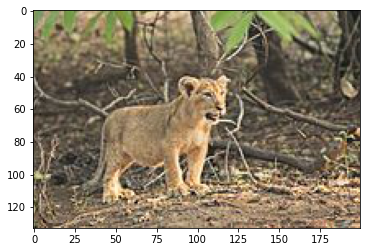

In [6]:
#copy the path of the uploaded image from the left panel and add within quotes below. 
#replace the example path given below, with your image path
cub_image = imageio.imread('/content/image.jpg')

# display the array of pixels as an image
plt.imshow(cub_image)
plt.show()

#### **Convert the image to a numpy array and print the data type, size, and shape of the image (3 pts)**

<font color='green'>**Why to numpy when it is already in numpy array format:**</font> imageio actually makes use of a **subclass of np.ndarray**. If needed, the image **can be converted to a plain numpy** array using np.asarray(im).

In [7]:
# Your code here
data = np.asarray(cub_image)
type(data), data.size, data.shape

(numpy.ndarray, 79800, (133, 200, 3))

#### **Rotate the image by 90 degrees, clockwise (3 pts)**
Hint: scipy.ndimage

<font color='green'>**Any other way rather taking -90:**</font> One thing what you can do is that roatate by 90+180 degrees.

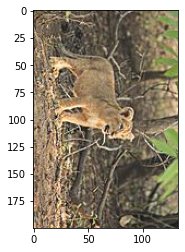

In [8]:
from scipy import ndimage
plt.imshow(ndimage.rotate(cub_image, -90));

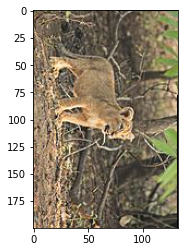

In [9]:
plt.imshow(ndimage.rotate(cub_image, 270));

#### **Obtain the min, max, and mean of the image (3 pts)**

In [10]:
np.min(data), np.max(data), np.mean(data)

(0, 255, 110.16462406015037)

#### **Blur the image (3 pts)**
  * Use Gaussian filter from Scipy library 

<font color='green'>**Why Gaussian and what are the others?**</font>
* A Gaussian filter is a linear filter. It's usually used to blur the image or to reduce noise.
* There are others like, Mean Filter, Median Filter, Canny Filter, etc..

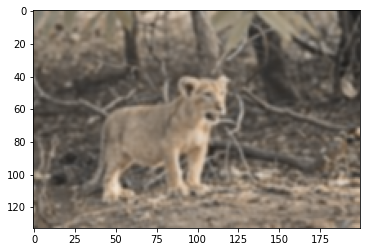

In [11]:
blurImg = gaussian_filter(data, sigma=1)
plt.imshow(blurImg);

#### **Convert the image to grayscale (3 pts)**

<font color='green'> **What is cmap in imshow?**</font>
* The colormap is a dictionary which maps numbers to colors.
* When you have a 2D array, such as data below, the values at each grid point is a float between 0 and 1.
* The *gray* colormap maps 0 to black and 1 to white.
* The *jet* colormap maps 0 to blue and 1 to red.

<font color='green'> **What is interpolation in imshow?**</font>
* interpolation='nearest' simply displays an image without trying to interpolate between pixels.
* If the display resolution is not the same as the image resolution (which is most often the case).
  * It will result an image in which pixels are displayed as a square of multiple pixels.

In [12]:
data.shape, np.mean(data), np.mean(data, axis=0).shape, np.mean(data, axis=1).shape,  np.mean(data, axis=2).shape

((133, 200, 3), 110.16462406015037, (200, 3), (133, 3), (133, 200))

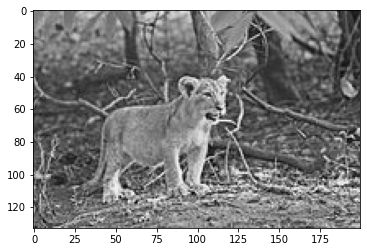

In [13]:
# Your code here
grayScaleImg = np.mean(data, axis=2)
plt.imshow(grayScaleImg, cmap=plt.get_cmap("gray"));

#### **Trim the Image to Half the original size  (3 pts)**

After trimming: (66, 200, 3)


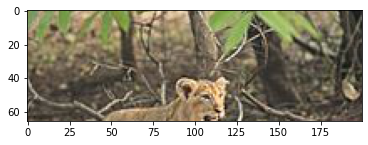

In [14]:
im_trim = data[0:data.shape[0] // 2]
print("After trimming:",im_trim.shape)
plt.imshow(im_trim);

#### **Flip the image (3 pts)**
Hint: np.flipud

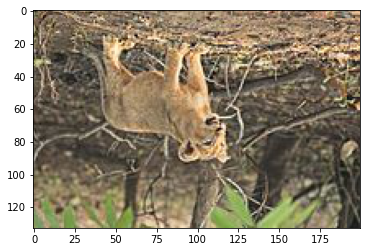

In [15]:
plt.imshow(np.flipud(data));

#### **Intensity Transformation by Gamma Correction in the Image  (5 pts)**  

Intensity transformations are applied to images for contrast manipulation or image thresholding.

Apply the formula $255 * (image/255)^{gamma}$   <br/>gamma values are given below


convert the array to 'uint8' datatype and plot the image for each and every gamma value.

<font color='green'>**Why uint8?**</font>
* int8_t - Byte (-128 to 127)
* uint8_t - Unsigned integer (0 to 255)
* int16_t - Integer (-32768 to 32767)
* uint16_t - Unsigned integer (0 to 65535)

**When single channel float image is passed to imshow it gets normalized to range [0,1] before display. This does not happen for RGB images.**</br></br>

<font color='blue'>**The reason is that imshow wants as input 0-1 float or 0-255 int. Since your image has values in the range 0-255 float, if you don't put np.uint8 it automatically clips them in integer values with the warning.**</font>

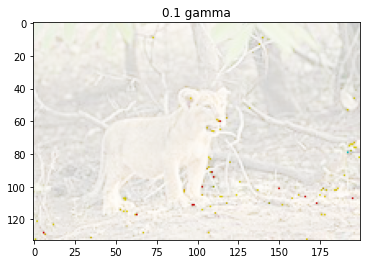

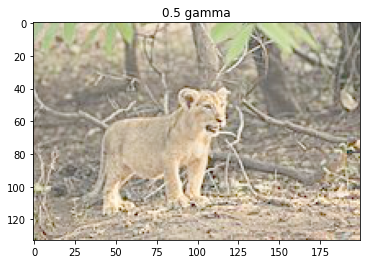

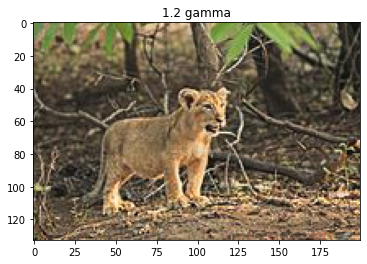

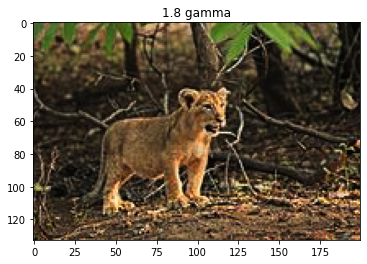

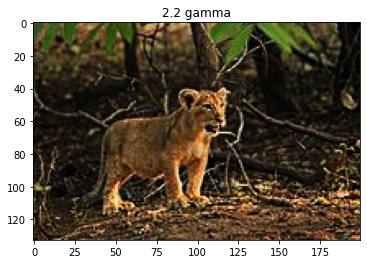

In [16]:
import numpy as np
gamma = [0.1, 0.5, 1.2, 1.8, 2.2]
for each in gamma: 
    gamma_corrected = np.array(255*(data / 255)** each, dtype = 'uint8') 
    plt.imshow(gamma_corrected)
    plt.title(str(each)+" gamma")
    plt.show()

#### **Plot the negative image (3 pts)**



Convert the array to `negative` by subtracting from the maximum pixel value.



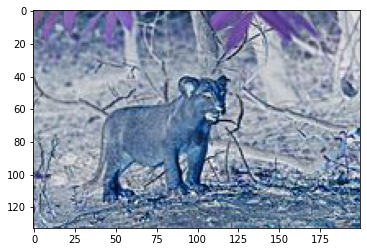

In [17]:
plt.imshow(255 - data);

#### **Color reduction (3 pts)**



1.   divide the array to certain color reduction value ex: 32*32 
2.   divide the array to certain color reduction value ex: 128*128 
3. Concatenate the 3 images (original, 32 * 32 reduced, 128 * 128 reduced) and plot the 3 images to depict variations.


In [ ]:
data // 2

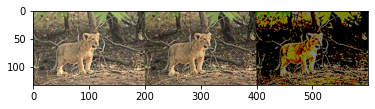

In [25]:
im_32 = (data // 32) * 32
im_128 = (data // 128) * 128

im_dec = np.concatenate((data, im_32, im_128), axis=1)

plt.imshow(im_dec);

#### **Crop the picture to get just the face of the cub (3 pts)**

1.  Take the height and width of the image

2.  By reducing the image height and width to 4th part, plot the image ( as we have 4 sides )


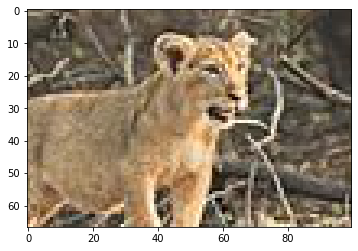

In [19]:
original_height, original_width,_ = np.asarray(data.shape)

## Reduce the height & width to 4th part
h, w = original_height//4, original_width//4

## Perform Array Slicing on the data
crop_face = data[h:-h, w:-w]
plt.imshow(crop_face);

#### **Save the numpy image into JPG format (3 pts)**
Hint: imageio.imwrite


In [20]:
imageio.imwrite('outfile.jpg', data)

Reference:
https://scipy-lectures.org/advanced/image_processing/